In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

# FCFM
### MINERIA DE DATOS
### NANCY NOHEMI DAVILA JUAREZ - 1937883


### Class introduction

In [2]:
df1=pd.read_csv("C:\\Users\\nohem\\OneDrive\\Escritorio\\mineria\\Inflacion México.csv") 
df1

,Año,Porcentaje
0,1920,5.00
1,1921,-8.84
2,1922,-16.17
3,1923,7.42
4,1924,-4.42
...,...,...
96,2016,3.36
97,2017,6.77
98,2018,4.83
99,2019,2.83


### Data cleaning

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         101 non-null    int64  
 1   Porcentaje  101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


 ### - No es necesario hacer limpieza, ya que los datos estan correctoy y ninguna celda esta vacia.

### Data Parsing

In [5]:
df1.shape

(101, 2)

In [6]:
df1.columns

Index(['Año', 'Porcentaje'], dtype='object')

In [7]:
df1.dtypes

Año             int64
Porcentaje    float64
dtype: object

### Mi base de datos trata sobre la Inflación de México, desde el año 1920 hasta el 2020, muestra los porcentajes del cambio en la inflación.

### Descriptive Statistics

In [9]:
df1.describe() 

,Año,Porcentaje
count,101.000000,101.000000
mean,1970.000000,13.262376
std,29.300171,24.578549
min,1920.000000,-16.170000
25%,1945.000000,2.770000
50%,1970.000000,5.200000
75%,1995.000000,16.370000
max,2020.000000,159.170000


   ### Data Visualization

<AxesSubplot:xlabel='Año', ylabel='Porcentaje'>

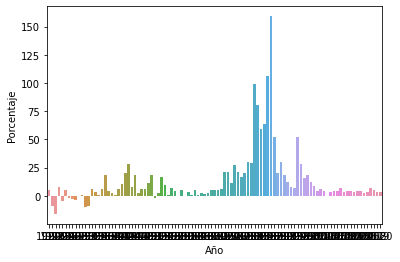

In [10]:
sns.barplot(x=df1['Año'], y=df1['Porcentaje'])

<AxesSubplot:xlabel='Año', ylabel='Porcentaje'>

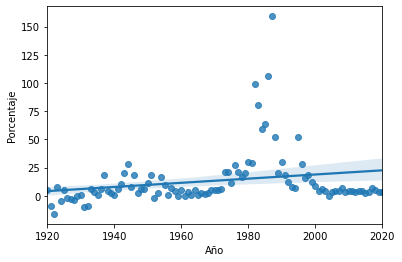

In [12]:
sns.regplot(x=df1['Año'],y=df1['Porcentaje'])

In [13]:
x=df1['Año'] 
y=df1[ 'Porcentaje']

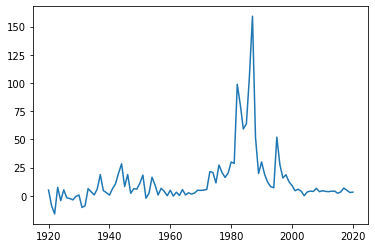

In [14]:
plt.plot(x,y)

### Statistic Test

In [15]:
import scipy.stats as stats

In [20]:
fvalue, pvalue = stats.f_oneway(df1['Año'], df1['Porcentaje'])
print(fvalue, pvalue)

264398.8032361685 3.937828304e-314
